<a href="https://colab.research.google.com/github/drfperez/algorithms/blob/main/Traveller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Camí trobat: ['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'SFO', 'SEA', 'JFK']


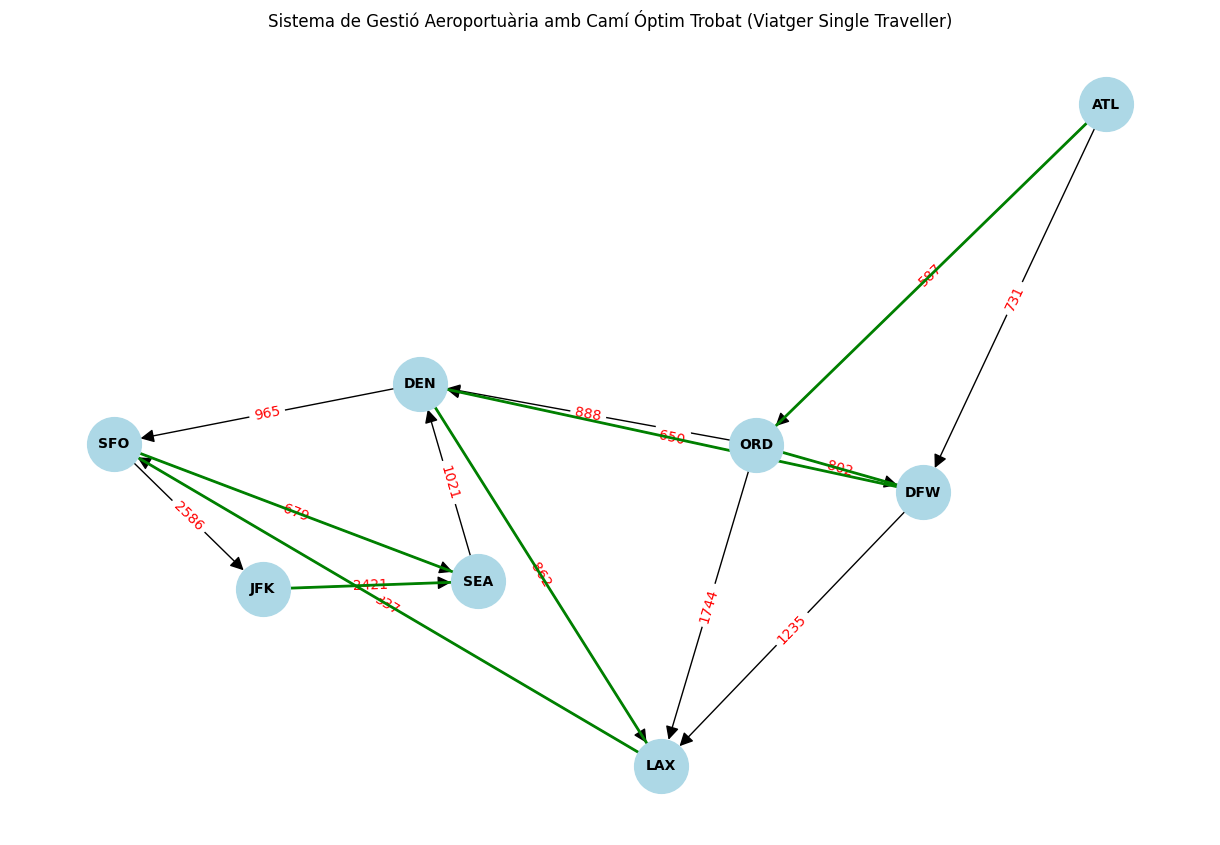

In [ ]:
# Algorisme Nearest Neightbour
import networkx as nx
import matplotlib.pyplot as plt

# Exemple de graella 2D amb distàncies entre aeroports
airport_distances = {
    "ATL": {"ORD": 587, "DFW": 731},
    "ORD": {"DEN": 888, "LAX": 1744, "DFW": 802},
    "DFW": {"DEN": 650, "LAX": 1235},
    "DEN": {"LAX": 862, "SFO": 965},
    "LAX": {"SFO": 337},
    "SFO": {"JFK": 2586, "SEA": 679},
    "JFK": {"SEA": 2421},
    "SEA": {"DEN": 1021}
}

# Funció per trobar el camí del viatger single traveller utilitzant l'algorisme Nearest Neighbor
def nearest_neighbor(start, graph):
    current_node = start
    unvisited_nodes = set(graph.keys())
    unvisited_nodes.remove(start)
    path = [current_node]

    while unvisited_nodes:
        nearest_node = min(unvisited_nodes, key=lambda x: graph[current_node].get(x, float('inf')))
        path.append(nearest_node)
        unvisited_nodes.remove(nearest_node)
        current_node = nearest_node

    return path

# Trobar el camí del viatger single traveller
tsp_path = nearest_neighbor("ATL", airport_distances)
print("Camí trobat:", tsp_path)

# Crear un graf dirigit amb NetworkX
G = nx.DiGraph()

# Afegir nodes (aeroports)
for airport in airport_distances:
    G.add_node(airport)

# Afegir arestes (rutes) amb pesos (distàncies)
for source, destinations in airport_distances.items():
    for destination, distance in destinations.items():
        G.add_edge(source, destination, weight=distance)

# Dibuixar el gràfic
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Dibuixar el camí del viatger single traveller
nx.draw_networkx_edges(G, pos, edgelist=[(tsp_path[i], tsp_path[i+1]) for i in range(len(tsp_path)-1)], edge_color='green', width=2.0)

plt.title("Sistema de Gestió Aeroportuària amb Camí Óptim Trobat (Viatger Single Traveller)")
plt.axis('off')
plt.show()

Camí trobat (Atzar aleatori): ['DEN', 'DFW', 'SEA', 'ORD', 'ATL', 'SFO', 'LAX', 'JFK']


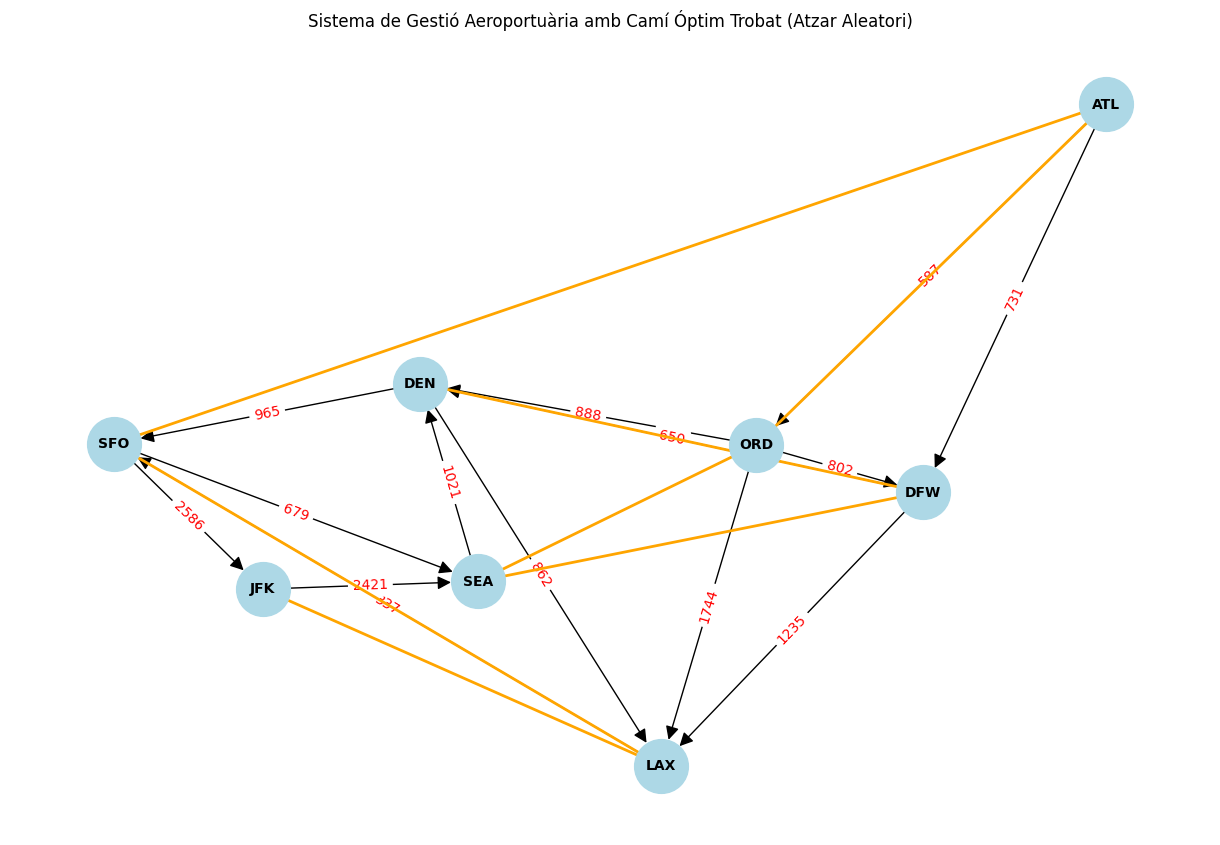

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt
import random

# Exemple de graella 2D amb distàncies entre aeroports
airport_distances = {
    "ATL": {"ORD": 587, "DFW": 731},
    "ORD": {"DEN": 888, "LAX": 1744, "DFW": 802},
    "DFW": {"DEN": 650, "LAX": 1235},
    "DEN": {"LAX": 862, "SFO": 965},
    "LAX": {"SFO": 337},
    "SFO": {"JFK": 2586, "SEA": 679},
    "JFK": {"SEA": 2421},
    "SEA": {"DEN": 1021}
}

# Funció per trobar el camí del viatger single traveller utilitzant l'algorisme de l'atzar aleatori
def random_tsp(start, graph):
    nodes = list(graph.keys())
    random.shuffle(nodes)
    return nodes

# Trobar el camí del viatger single traveller
tsp_path_random = random_tsp("ATL", airport_distances)
print("Camí trobat (Atzar aleatori):", tsp_path_random)

# Crear un graf dirigit amb NetworkX
G = nx.DiGraph()

# Afegir nodes (aeroports)
for airport in airport_distances:
    G.add_node(airport)

# Afegir arestes (rutes) amb pesos (distàncies)
for source, destinations in airport_distances.items():
    for destination, distance in destinations.items():
        G.add_edge(source, destination, weight=distance)

# Dibuixar el gràfic
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Dibuixar el camí del viatger single traveller amb l'algorisme de l'atzar aleatori
nx.draw_networkx_edges(G, pos, edgelist=[(tsp_path_random[i], tsp_path_random[i+1]) for i in range(len(tsp_path_random)-1)], edge_color='orange', width=2.0)

plt.title("Sistema de Gestió Aeroportuària amb Camí Óptim Trobat (Atzar Aleatori)")
plt.axis('off')
plt.show()

In [4]:

import random

# Exemple de graella 2D amb distàncies entre aeroports
airport_distances = {
    "ATL": {"ORD": 587, "DFW": 731},
    "ORD": {"DEN": 888, "LAX": 1744, "DFW": 802},
    "DFW": {"DEN": 650, "LAX": 1235},
    "DEN": {"LAX": 862, "SFO": 965},
    "LAX": {"SFO": 337},
    "SFO": {"JFK": 2586, "SEA": 679},
    "JFK": {"SEA": 2421},
    "SEA": {"DEN": 1021, "JFK": 2421}
}
# Funció per calcular la distància recorreguda en un camí
def calculate_distance(path, graph):
    total_distance = 0
    for i in range(len(path)-1):
        source = path[i]
        destination = path[i+1]
        total_distance += graph.get(source, {}).get(destination, 0)
    return total_distance if total_distance > 0 else None

# Funció per verificar si un camí és vàlid
def is_valid_path(path, graph):
    return all(path[i+1] in graph.get(path[i], {}) for i in range(len(path)-1))

# Funció per trobar el camí del viatger single traveller utilitzant l'algorisme de l'atzar aleatori
def random_tsp(start, graph):
    nodes = list(graph.keys())
    nodes.remove(start)
    while True:
        random.shuffle(nodes)
        path = [start] + nodes
        if is_valid_path(path, graph):
            return path

# Funció per trobar el camí del viatger single traveller utilitzant l'algorisme Nearest Neighbor
def nearest_neighbor(start, graph):
    current_node = start
    unvisited_nodes = set(graph.keys())
    unvisited_nodes.remove(start)
    path = [current_node]

    while unvisited_nodes:
        nearest_node = min(unvisited_nodes, key=lambda x: graph[current_node].get(x, float('inf')))
        path.append(nearest_node)
        unvisited_nodes.remove(nearest_node)
        current_node = nearest_node

    return path# Trobar el camí del viatger single traveller amb l'atzar aleatori
tsp_path_random = random_tsp("ATL", airport_distances)
distance_random = calculate_distance(tsp_path_random, airport_distances)

# Trobar el camí del viatger single traveller amb Nearest Neighbor
tsp_path_nn = nearest_neighbor("ATL", airport_distances)
distance_nn = calculate_distance(tsp_path_nn, airport_distances)

# Resultados
if distance_random is not None:
    print("Distància recorreguda amb Atzar Aleatori:", distance_random)
print("Distància recorreguda amb Nearest Neighbor:", distance_nn)

Distància recorreguda amb Atzar Aleatori: 8245
Distància recorreguda amb Nearest Neighbor: 6338


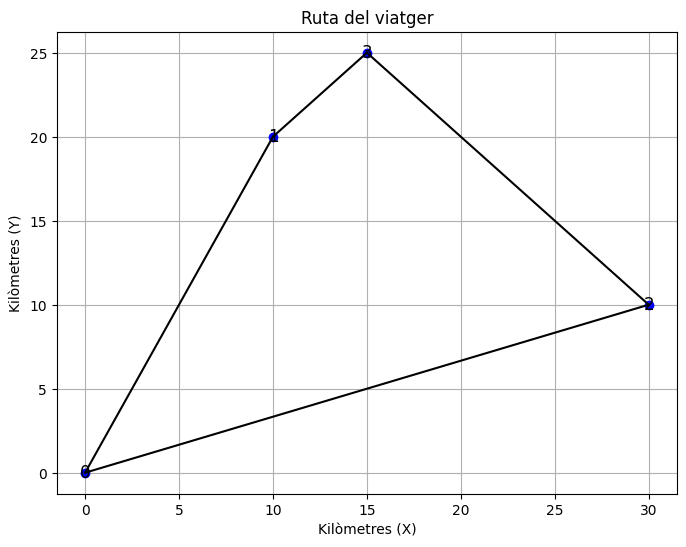

Ruta òptima: [0, 1, 3, 2, 0]
Distància total: 80 km


In [ ]:

!pip install ortools

import matplotlib.pyplot as plt
import numpy as np
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

def create_data_model():
    data = {}
    data['distance_matrix'] = [
        [0, 10, 15, 20],  # Distàncies des de la ciutat 0
        [10, 0, 35, 25],  # Distàncies des de la ciutat 1
        [15, 35, 0, 30],  # Distàncies des de la ciutat 2
        [20, 25, 30, 0],  # Distàncies des de la ciutat 3
    ]
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data

def get_solution(manager, routing, solution):
    index = routing.Start(0)
    route = []
    total_distance = 0  # Variable per emmagatzemar la distància total
    while not routing.IsEnd(index):
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route.append(previous_index)
        total_distance += routing.GetArcCostForVehicle(previous_index, index, 0)  # Suma de la distància de l'arc
    route.append(manager.IndexToNode(index))
    return route, total_distance

def main():
    data = create_data_model()

    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']), data['num_vehicles'], data['depot'])
    routing = pywrapcp.RoutingModel(manager)

    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    solution = routing.SolveWithParameters(search_parameters)
    if solution:
        route, total_distance = get_solution(manager, routing, solution)

        # Coordineades reals de les ciutats en km
        city_coordinates = [
            (0, 0),     # Ciutat 0
            (10, 20),   # Ciutat 1
            (30, 10),   # Ciutat 2
            (15, 25),   # Ciutat 3
        ]

        plt.figure(figsize=(8, 6))
        plt.plot([x for x, y in city_coordinates], [y for x, y in city_coordinates], 'bo')
        for i, coord in enumerate(city_coordinates):
            plt.text(coord[0], coord[1], str(i), fontsize=12, ha='center', va='center')
        for i in range(len(route) - 1):
            city1 = route[i]
            city2 = route[i + 1]
            plt.plot([city_coordinates[city1][0], city_coordinates[city2][0]],
                     [city_coordinates[city1][1], city_coordinates[city2][1]], 'k-')
        plt.plot([city_coordinates[route[-1]][0], city_coordinates[route[0]][0]],
                 [city_coordinates[route[-1]][1], city_coordinates[route[0]][1]], 'k-')
        plt.title('Ruta del viatger')
        plt.xlabel('Kilòmetres (X)')
        plt.ylabel('Kilòmetres (Y)')
        plt.grid(True)
        plt.show()

        print("Ruta òptima:", route)
        print("Distància total:", total_distance, "km")
    else:
        print('No s\'ha trobat solució.')

if __name__ == '__main__':
    main()

In [ ]:
!pip install ortools
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

def create_data_model():
    data = {}
    data['distance_matrix'] = [
        [0, 10, 15, 20],  # Distàncies des de la ciutat 0
        [10, 0, 35, 25],  # Distàncies des de la ciutat 1
        [15, 35, 0, 30],  # Distàncies des de la ciutat 2
        [20, 25, 30, 0],  # Distàncies des de la ciutat 3
    ]
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data

def get_solution(manager, routing, solution):
    index = routing.Start(0)
    plan_output = 'Ruta:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    plan_output += 'Distància total: {} km\n'.format(route_distance)
    return plan_output

def main():
    data = create_data_model()

    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']), data['num_vehicles'], data['depot'])
    routing = pywrapcp.RoutingModel(manager)

    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    solution = routing.SolveWithParameters(search_parameters)
    if solution:
        print(get_solution(manager, routing, solution))
    else:
        print('No s\'ha trobat solució.')

if __name__ == '__main__':
    main()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.4.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.26.1 which is incompatible.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21

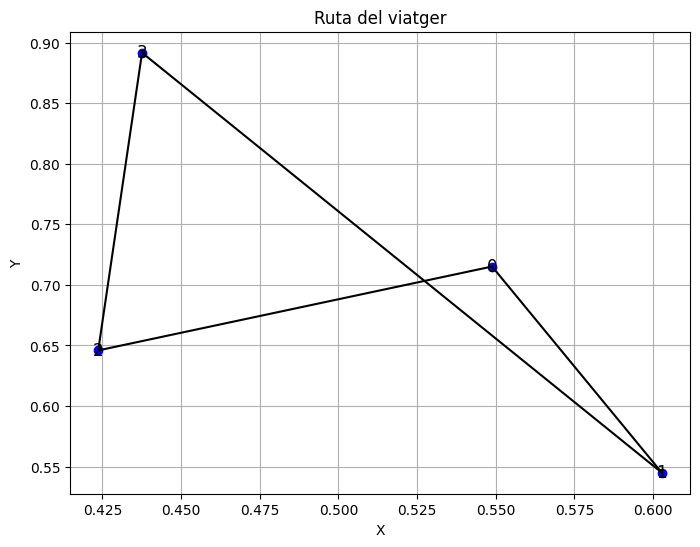

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

def create_data_model():
    data = {}
    data['distance_matrix'] = [
        [0, 10, 15, 20],  # Distàncies des de la ciutat 0
        [10, 0, 35, 25],  # Distàncies des de la ciutat 1
        [15, 35, 0, 30],  # Distàncies des de la ciutat 2
        [20, 25, 30, 0],  # Distàncies des de la ciutat 3
    ]
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data

def get_solution(manager, routing, solution):
    index = routing.Start(0)
    route = []
    while not routing.IsEnd(index):
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route.append(previous_index)
    route.append(manager.IndexToNode(index))
    return route

def main():
    data = create_data_model()

    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']), data['num_vehicles'], data['depot'])
    routing = pywrapcp.RoutingModel(manager)

    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    solution = routing.SolveWithParameters(search_parameters)
    if solution:
        route = get_solution(manager, routing, solution)

        cities = len(data['distance_matrix'])
        np.random.seed(0)
        city_coordinates = np.random.rand(cities, 2)

        plt.figure(figsize=(8, 6))
        plt.plot(city_coordinates[:, 0], city_coordinates[:, 1], 'bo')
        for i, coord in enumerate(city_coordinates):
            plt.text(coord[0], coord[1], str(i), fontsize=12, ha='center', va='center')
        for i in range(len(route) - 1):
            city1 = route[i]
            city2 = route[i + 1]
            plt.plot([city_coordinates[city1, 0], city_coordinates[city2, 0]],
                     [city_coordinates[city1, 1], city_coordinates[city2, 1]], 'k-')
        plt.plot([city_coordinates[route[-1], 0], city_coordinates[route[0], 0]],
                 [city_coordinates[route[-1], 1], city_coordinates[route[0], 1]], 'k-')
        plt.title('Ruta del viatger')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.show()

if __name__ == '__main__':
    main()

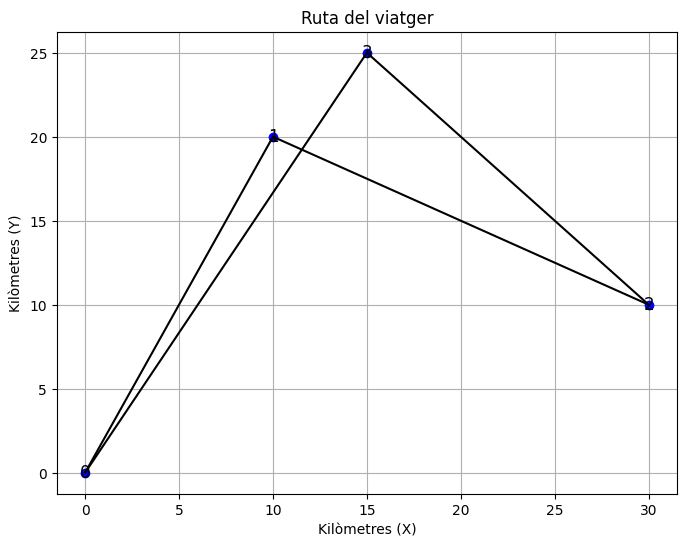

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

def create_data_model():
    data = {}
    # Les coordenades reals de les ciutats en km
    city_coordinates = [
        (0, 0),     # Ciutat 0
        (10, 20),   # Ciutat 1
        (30, 10),   # Ciutat 2
        (15, 25),   # Ciutat 3
    ]
    # Calcula la matriu de distàncies a partir de les coordenades
    data['distance_matrix'] = calculate_distance_matrix(city_coordinates)
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data

def calculate_distance_matrix(coordinates):
    # Calcula la matriu de distàncies a partir de les coordenades utilitzant la fórmula de la distància euclidiana
    cities = len(coordinates)
    distance_matrix = np.zeros((cities, cities))
    for i in range(cities):
        for j in range(cities):
            if i != j:
                distance_matrix[i][j] = np.linalg.norm(np.array(coordinates[i]) - np.array(coordinates[j]))
    return distance_matrix

def get_solution(manager, routing, solution):
    index = routing.Start(0)
    route = []
    while not routing.IsEnd(index):
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route.append(previous_index)
    route.append(manager.IndexToNode(index))
    return route

def main():
    data = create_data_model()

    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']), data['num_vehicles'], data['depot'])
    routing = pywrapcp.RoutingModel(manager)

    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    solution = routing.SolveWithParameters(search_parameters)
    if solution:
        route = get_solution(manager, routing, solution)

        # Coordineades reals de les ciutats en km
        city_coordinates = [
            (0, 0),     # Ciutat 0
            (10, 20),   # Ciutat 1
            (30, 10),   # Ciutat 2
            (15, 25),   # Ciutat 3
        ]

        plt.figure(figsize=(8, 6))
        # Dibuixem les ciutats com a punts
        plt.plot([x for x, y in city_coordinates], [y for x, y in city_coordinates], 'bo')
        # Anotem el nom de cada ciutat
        for i, coord in enumerate(city_coordinates):
            plt.text(coord[0], coord[1], str(i), fontsize=12, ha='center', va='center')
        # Dibuixem la ruta del viatger
        for i in range(len(route) - 1):
            city1 = route[i]
            city2 = route[i + 1]
            plt.plot([city_coordinates[city1][0], city_coordinates[city2][0]],
                     [city_coordinates[city1][1], city_coordinates[city2][1]], 'k-')
        plt.plot([city_coordinates[route[-1]][0], city_coordinates[route[0]][0]],
                 [city_coordinates[route[-1]][1], city_coordinates[route[0]][1]], 'k-')
        plt.title('Ruta del viatger')
        plt.xlabel('Kilòmetres (X)')
        plt.ylabel('Kilòmetres (Y)')
        plt.grid(True)
        plt.show()

if __name__ == '__main__':
    main()